In [2]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, kstest, normaltest,skew

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

### Data Gathering

In [3]:
df=pd.read_csv('advertising_saloni.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.axes

[RangeIndex(start=0, stop=200, step=1),
 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')]

<function matplotlib.pyplot.show(close=None, block=None)>

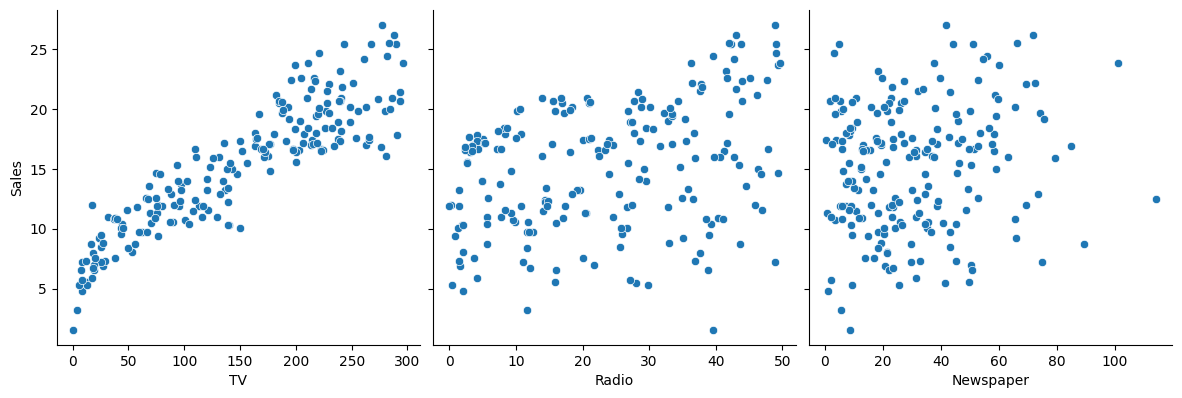

In [10]:
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'] ,y_vars=['Sales'], height=4 ,aspect=1 ,kind='scatter')
plt.show

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

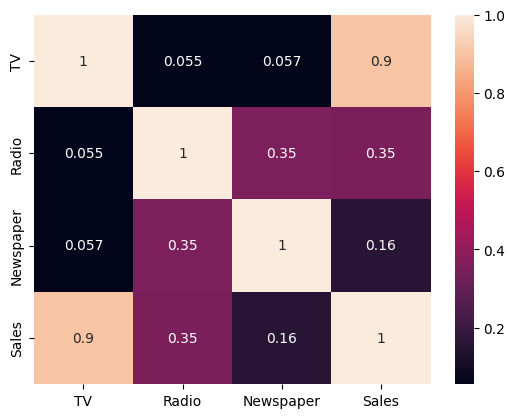

In [12]:
sns.heatmap(df.corr(),annot=True)

## visualization

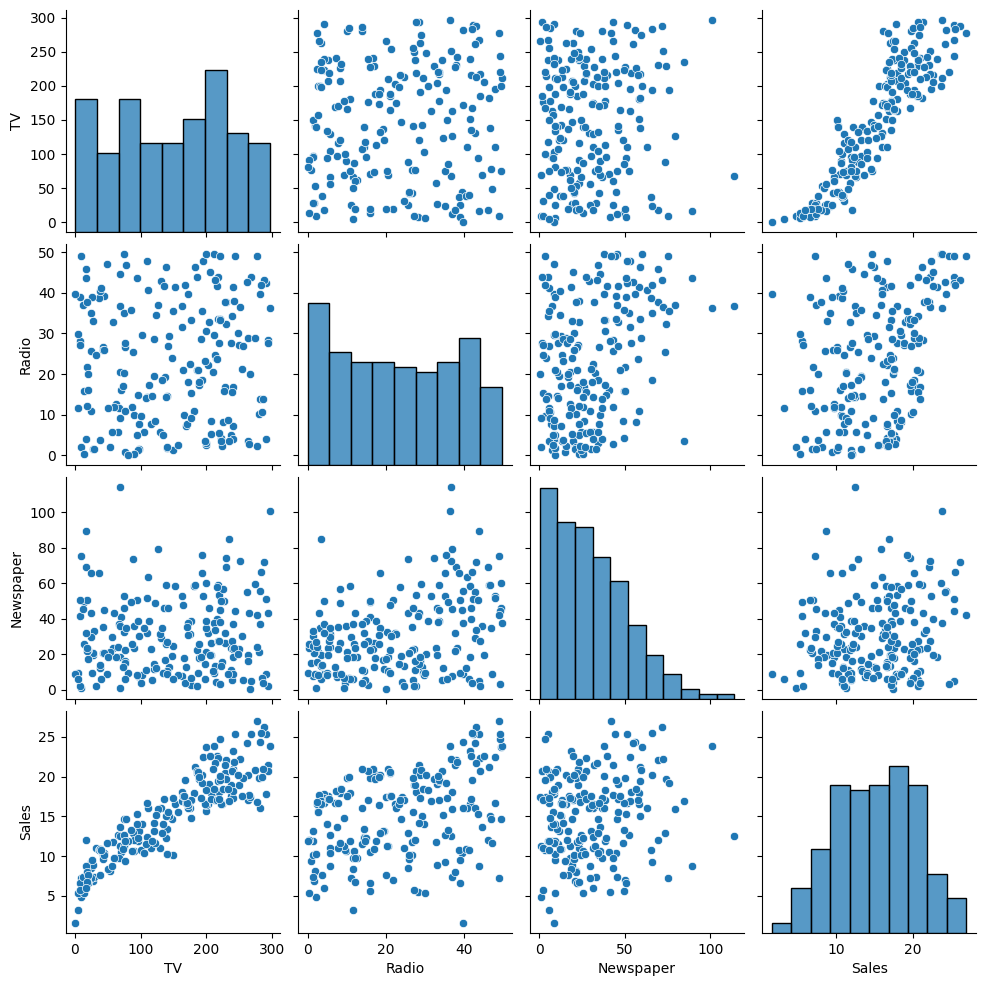

In [13]:
sns.pairplot(df)

### Feature Engineering 

### Linearity

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

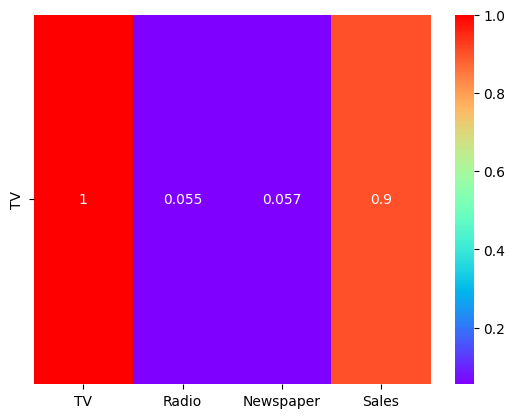

In [15]:
sns.heatmap(df.corr().head(1),annot=True,cmap='rainbow')

## no multicolinearity

### Independent And Dependent Variable

In [16]:
x= df.drop('Sales',axis=1)

In [17]:
y= df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [18]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

## Varience_inflation_factor

In [20]:
for idx in range(x.shape[1]):
    VIF= variance_inflation_factor(x,idx)
    print('VIF:',VIF)

VIF: 2.486771835198193
VIF: 3.285462100162896
VIF: 3.0552445106573853


<Axes: >

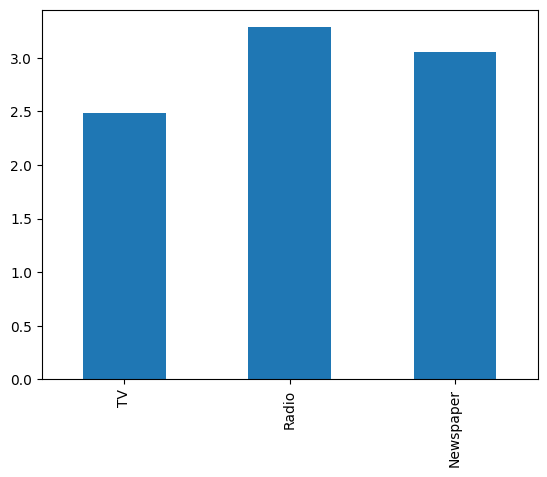

In [21]:
vif_list=[]
for idx in range(x.shape[1]):
    VIF=variance_inflation_factor(x,idx)
    vif_list.append(VIF)
s1=pd.Series(vif_list,index=x.columns)
s1.plot(kind='bar')

<Axes: >

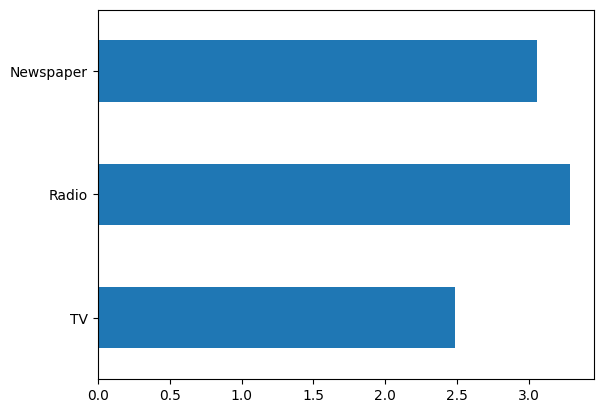

In [22]:
vif_list=[]
for idx in range(x.shape[1]):
    VIF=variance_inflation_factor(x,idx)
    vif_list.append(VIF)
s1=pd.Series(vif_list,index=x.columns)
s1.plot(kind='barh')

### train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 23)

### Model Training

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg

LinearRegression()

## coefficient

In [25]:
np.around(lin_reg.coef_,3)

array([0.054, 0.102, 0.005])

### Intercept

In [26]:
lin_reg.intercept_

4.612029874800378

### Training Data Evaluation

In [27]:
y_pred=lin_reg.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('mse:',mse)
rmse=np.sqrt(mse)
print('rmse:',rmse)
r_squared= r2_score(y_train,y_pred)
print('r_squared:',r_squared)

mse: 2.783144397241511
rmse: 1.668275875639731
r_squared: 0.895010657388199


In [28]:
y_predi_test=lin_reg.predict(x_test)
y_predi_test.shape

(40,)

### Testing Data Evaluation

In [29]:
mse=mean_squared_error(y_test,y_predi_test)
print('mse:',mse)
rmse= np.sqrt(mse)
print('rmse:',rmse)
r_squared=r2_score(y_test,y_predi_test)
print('r_squared:',r_squared)

mse: 2.4586818189137034
rmse: 1.5680184370452102
r_squared: 0.9237886847998976


In [30]:
with open("linear_regression.pkl", 'wb') as f:
    pickle.dump(lin_reg,f)


In [31]:
column_name=lin_reg.feature_names_in_
column_name

array(['TV', 'Radio', 'Newspaper'], dtype=object)

In [32]:
df.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')